In [1]:
import re

# Data Science
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
%matplotlib inline

# Lectura de datos

In [2]:
data = pd.read_csv("../Datos/historicos-pib.csv", header=None).T # series en vertical
data.iloc[0,:2] = ["Año", "Trimestre"] # Renombrando columnas
columns = data.iloc[0] # Obteniendo nombre de las columnas
data = data.iloc[1:,:] # Quedándonos con la serie solamente

# expresión regular para quedarnos nada mas con el nombre de los sectores
pattern = re.compile(r"[\w .-]* - ")
new_columns = columns.apply(lambda col: pattern.sub("", col))
data.columns = new_columns

data.Año.fillna(method="pad", inplace = True) # rellenando columna de años
data.Año = data.Año.apply(lambda año:int(str(año)[:4])) # quitando etiquetas de R y P
data.Trimestre = data.Trimestre.apply(lambda t:t[:2] if t[0] == "T" else t) # quitando etiquetas
data.set_index(["Año", "Trimestre"], inplace=True) # multindex de año y trimestre

# Pasando todo a numérico
for column in data.columns:
    data[column] = data[column].apply(lambda n:float(n.replace(" ", "")) if isinstance(n,str) else n)

data

0               Impuestos sobre los productos, netos  Agricultura  \
Año  Trimestre                                                      
1993 T1                                     388594.0     216828.0   
     T2                                     388084.0     209611.0   
     T3                                     379390.0     179794.0   
     T4                                     422664.0     245272.0   
     6 Meses                                388339.0     213220.0   
...                                              ...          ...   
2020 T3                                     713290.0     305998.0   
     T4                                          NaN          NaN   
     6 Meses                                701259.0     371996.0   
     9 Meses                                705270.0     349996.0   
     Anual                                       NaN          NaN   

0               Cría y explotación de animales  Aprovechamiento forestal  \
Año  Trimestre                                                             
1993 T1                               111883.0                   17803.0   
     T2                               126136.0                   17044.0   
     T3                               146416.0                   16858.0   
     T4                               133375.0                   16537.0   
     6 Meses                          119010.0                   17424.0   
...                                        ...                       ...   
2020 T3                               193131.0                   17010.0   
     T4                                    NaN                       NaN   
     6 Meses                          177412.0                   17036.0   
     9 Meses                          182652.0                   17028.0   
     Anual                                 NaN                       NaN   

0               Pesca, caza y captura  \
Año  Trimestre                          
1993 T1                        9059.0   
     T2                       10803.0   
     T3                        8911.0   
     T4                       10099.0   
     6 Meses                   9931.0   
...                               ...   
2020 T3                       14996.0   
     T4                           NaN   
     6 Meses                  13754.0   
     9 Meses                  14168.0   
     Anual                        NaN   

0               Servicios relacionados con las actividades agropecuarias y forestales  \
Año  Trimestre                                                                          
1993 T1                                                     649.0                       
     T2                                                     498.0                       
     T3                                                     582.0                       
     T4                                                     730.0                       
     6 Meses                                                573.0                       
...                                                           ...                       
2020 T3                                                    1056.0                       
     T4                                                       NaN                       
     6 Meses                                               1433.0                       
     9 Meses                                               1307.0                       
     Anual                                                    NaN                       

0               Extracción de petróleo y gas  \
Año  Trimestre                                 
1993 T1                             865047.0   
     T2                             895218.0   
     T3                             901125.0   
     T4                             923834.0   
     6 Meses                        880133.0   
...                                      ...   
2020 T3                             5

# Selección trimestral

In [3]:
select = "T1 T2 T3 T4".split()
trimestrales = data.loc[pd.IndexSlice[:, select], :].sort_index()
trimestrales.dropna(inplace=True)
#trimestrales.to_csv("../Datos/trimestrales.csv")
trimestrales

0               Impuestos sobre los productos, netos  Agricultura  \
Año  Trimestre                                                      
1993 T1                                     388594.0     216828.0   
     T2                                     388084.0     209611.0   
     T3                                     379390.0     179794.0   
     T4                                     422664.0     245272.0   
1994 T1                                     409250.0     212307.0   
...                                              ...          ...   
2019 T3                                     822448.0     269969.0   
     T4                                     849938.0     454425.0   
2020 T1                                     774944.0     355884.0   
     T2                                     627575.0     388108.0   
     T3                                     713290.0     305998.0   

0               Cría y explotación de animales  Aprovechamiento forestal  \
Año  Trimestre                                                             
1993 T1                               111883.0                   17803.0   
     T2                               126136.0                   17044.0   
     T3                               146416.0                   16858.0   
     T4                               133375.0                   16537.0   
1994 T1                               110839.0                   16421.0   
...                                        ...                       ...   
2019 T3                               187821.0                   19273.0   
     T4                               196956.0                   20543.0   
2020 T1                               174004.0                   18816.0   
     T2                               180821.0                   15257.0   
     T3                               193131.0                   17010.0   

0               Pesca, caza y captura  \
Año  Trimestre                          
1993 T1                        9059.0   
     T2                       10803.0   
     T3                        8911.0   
     T4                       10099.0   
1994 T1                        9077.0   
...                               ...   
2019 T3                       15774.0   
     T4                       17219.0   
2020 T1                       12756.0   
     T2                       14752.0   
     T3                       14996.0   

0               Servicios relacionados con las actividades agropecuarias y forestales  \
Año  Trimestre                                                                          
1993 T1                                                     649.0                       
     T2                                                     498.0                       
     T3                                                     582.0                       
     T4                                                     730.0                       
1994 T1                                                     890.0                       
...                                                           ...                       
2019 T3                                                    1439.0                       
     T4                                                    4584.0                       
2020 T1                                                    1653.0                       
     T2                                                    1214.0                       
     T3                                                    1056.0                       

0               Extracción de petróleo y gas  \
Año  Trimestre                                 
1993 T1                             865047.0   
     T2                             895218.0   
     T3                             901125.0   
     T4                             923834.0   
1994 T1                             895605.0   
...                                      ...   
2019 T3                             6

In [4]:
trimestrales.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
"Impuestos sobre los productos, netos",111.0,575762.873874,128583.905263,363922.0,478396.5,564549.0,645443.5,856581.0
Agricultura,111.0,284996.324324,68647.640492,160516.0,238052.0,271536.0,327071.5,468778.0
Cría y explotación de animales,111.0,152525.450450,21547.622932,108194.0,134879.0,153806.0,169911.0,196956.0
Aprovechamiento forestal,111.0,18524.153153,1642.547728,15257.0,17146.5,18469.0,19677.5,22714.0
"Pesca, caza y captura",111.0,11808.864865,2693.023531,7768.0,9943.0,11304.0,13076.5,20953.0
...,...,...,...,...,...,...,...,...
Servicios de preparación de alimentos y bebidas,111.0,205292.045045,25518.901494,104661.0,187639.0,204978.0,220771.5,278830.0
Servicios de reparación y mantenimiento,111.0,68345.576577,11611.789904,43750.0,59845.0,71882.0,77105.5,92781.0
Servicios personales,111.0,126533.891892,17296.489626,95921.0,111032.0,126818.0,140161.0,157347.0


# PIB en total (por trimestres)

In [5]:
totales = trimestrales.sum(axis=1)
totales.shape

(111,)

In [6]:
totales.head(8)

Año   Trimestre
1993  T1           10008894.0
      T2           10171035.0
      T3           10066263.0
      T4           10416101.0
1994  T1           10343396.0
      T2           10772524.0
      T3           10602753.0
      T4           10952771.0
dtype: float64

In [7]:
totales.describe()

count    1.110000e+02
mean     1.431392e+07
std      2.573846e+06
min      9.795716e+06
25%      1.248511e+07
50%      1.430652e+07
75%      1.627399e+07
max      1.899003e+07
dtype: float64

Text(0.5, 1.0, 'PIB')

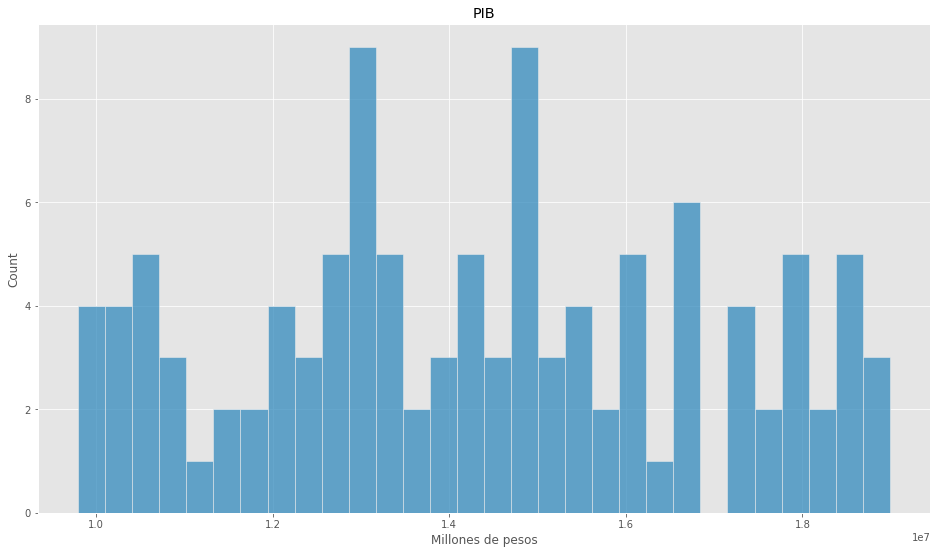

In [8]:
fig, ax = plt.subplots(figsize=(16,9))

sns.histplot(data=totales, ax=ax, bins=30)
ax.set_xlabel("Millones de pesos")
ax.set_title("PIB")

Text(0, 0.5, 'Millones de pesos')

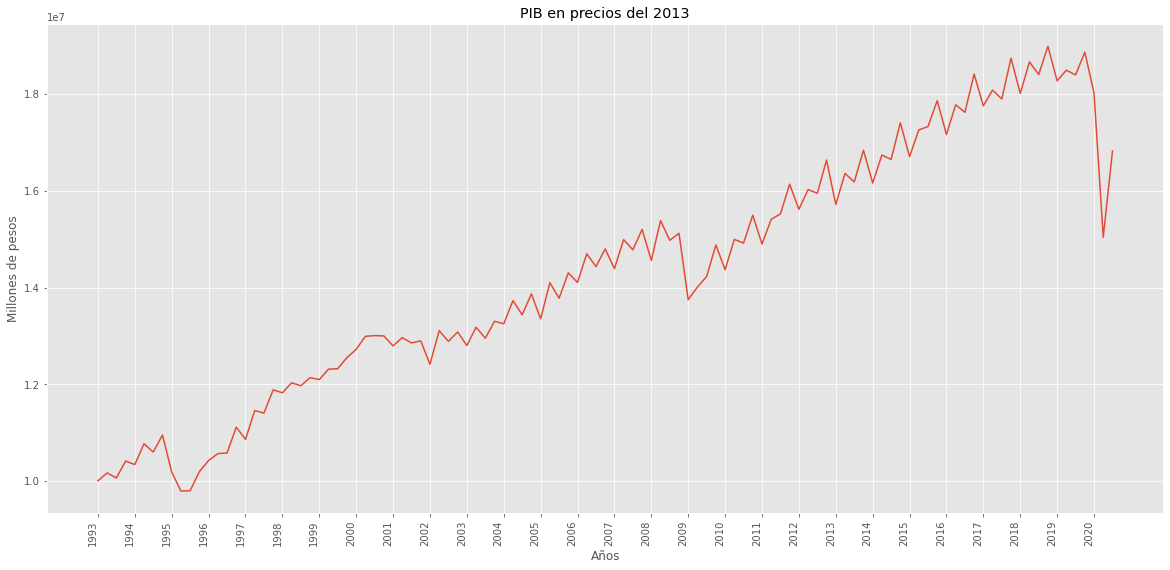

In [9]:
fig, ax = plt.subplots(figsize=(20,9))

dates = totales.index.to_flat_index().values.tolist()
años = [año for año, trimestre in dates if trimestre == "T1"]

ax.plot(totales.values)
ax.set_xticks(np.arange(0, totales.shape[0], 4)) # ticks cada año
ax.set_xticklabels(años, rotation=90, ha='right')
ax.set_title("PIB en precios del 2013")
ax.set_xlabel("Años")
ax.set_ylabel("Millones de pesos")

* Tendencia creciente aditiva
* Periodicidad semestral (?)

# Visualización de series

<AxesSubplot:xlabel='Agricultura', ylabel='Count'>

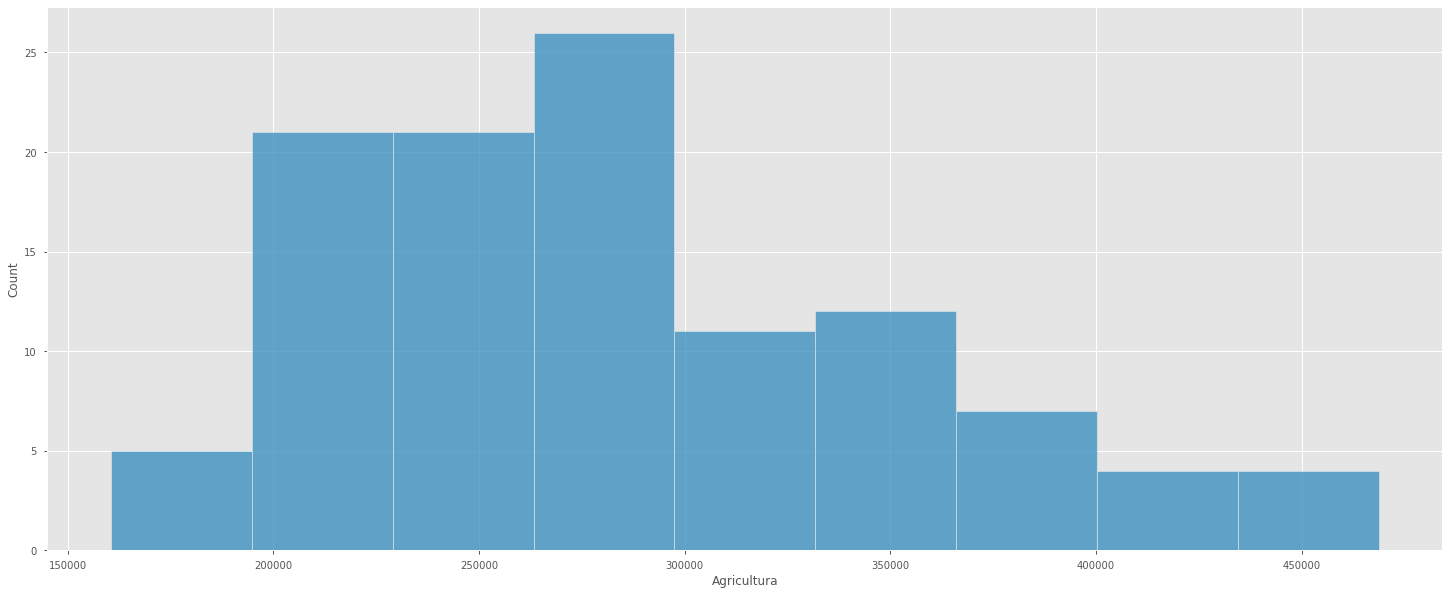

In [25]:
fig, ax = plt.subplots(figsize=(25,10))

sns.histplot(trimestrales, x="Agricultura", ax=ax)

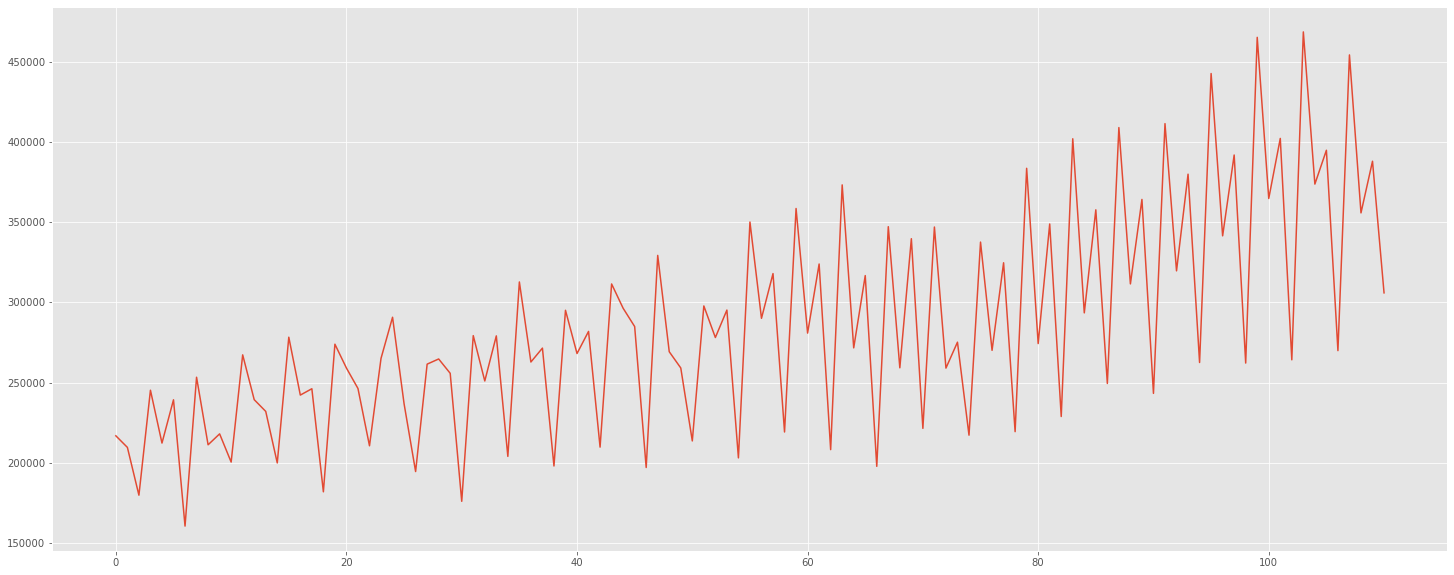

In [99]:
fig, ax = plt.subplots(figsize=(25,10))

ax.plot(np.arange(trimestrales["Agricultura"].size), trimestrales["Agricultura"])

# Diagramas de dispersión

In [100]:
def scatterplot(df, x, y, ax=None):
    if not ax:
        ax = plt.gca()
    
    ax.scatter(df[x], df[y])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f"{x} vs {y}")

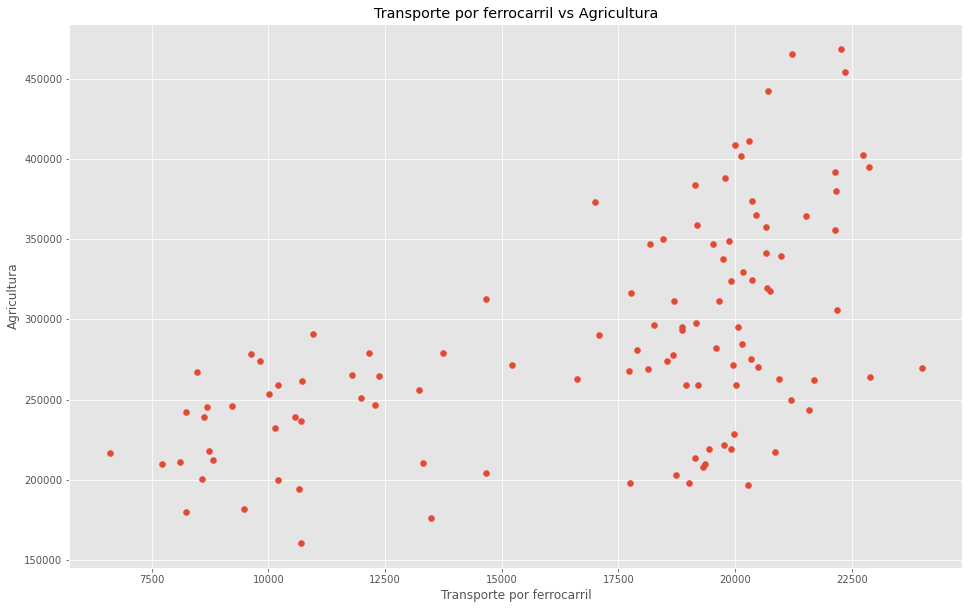

In [101]:
fig, ax = plt.subplots(figsize=(16,10))

scatterplot(trimestrales, "Transporte por ferrocarril", "Agricultura")

# Correlaciones

In [131]:
%matplotlib qt

corr = trimestrales.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(40, 35))

cmap = sns.diverging_palette(230, 0, l=37, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:xlabel='0', ylabel='0'>

------------
# Variables

Pon lo que quieres encontrar en `busqueda`

In [142]:
busqueda = "alambre"
for columna in trimestrales.columns:
    if busqueda.lower() in columna.lower():
        print(columna)

Fabricación de alambre, productos de alambre y resortes


In [141]:
trimestrales.loc[:,"Fabricación de alambre, productos de alambre y resortes"].mean()

6544.972972972973

# PCA

In [93]:
%matplotlib inline

from sklearn.decomposition import PCA

In [24]:
X = trimestrales.values
X.shape

(111, 135)

In [41]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
X_r.shape

(111, 2)

In [97]:
pca.explained_variance_ratio_

array([0.89786267, 0.05096582])

In [54]:
def correlaciones_pca(original, componentes):
    n_rows, n_cols = original.shape
    _, n_comps = componentes.shape
    correlaciones = np.corrcoef(original, componentes, rowvar=False)
    return correlaciones[:-n_comps, n_cols:]

In [58]:
corrs = correlaciones_pca(X, X_r)

corrs.shape

Text(0, 0.5, 'Componente 2')

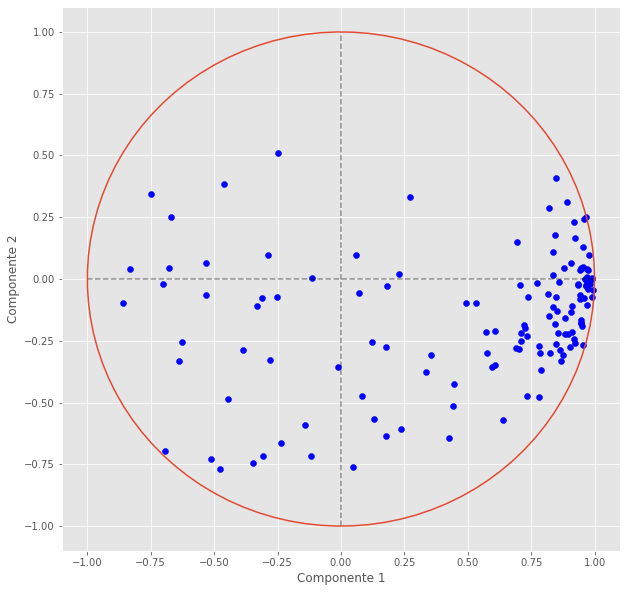

In [69]:
plt.figure(figsize=(10,10))

θ = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(θ), np.sin(θ))
plt.vlines(x=0, ymin=-1, ymax=1, color="black", ls="--", alpha=0.4)
plt.hlines(y=0, xmin=-1, xmax=1, color="black", ls="--", alpha=0.4)
plt.scatter(corrs[:,0], corrs[:,1], c="blue")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")

# Otras variables


## Desempleo

In [228]:
desempleo = pd.read_csv("../Datos/desempleo.csv")
desempleo.columns = ["fecha", "porcentaje"]
desempleo

,fecha,porcentaje
0,2005/01,3.636756
1,2005/02,3.551412
2,2005/03,3.632570
3,2005/04,3.566528
4,2005/05,3.677931
...,...,...
187,2020/08,4.914508
188,2020/09,4.724830
189,2020/10,4.606045
190,2020/11,4.489075


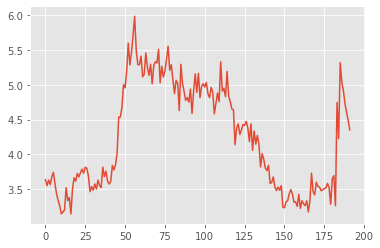

In [229]:
plt.plot(desempleo.porcentaje)

Tenemos las tasas de desempleo a partir del 2005, y se ven algo difícil de rellenar con algún modelo, yo creo que lo más sensato es descartar esta variable


## Tipo de cambio

In [230]:
mes_a_trimestre = {"Ene":"T1", "Feb":"T1", "Mar":"T1",
                   "Abr":"T2", "May":"T2", "Jun":"T2",
                   "Jul":"T3", "Ago":"T3", "Sep":"T3",
                   "Oct":"T4", "Nov":"T4", "Dic":"T4"}

entero_a_trimestre = tuple(mes_a_trimestre.values())

In [300]:
tipos = pd.read_csv("../Datos/tipo_de_cambio.csv", parse_dates=[0])
tipos.columns = ["Fecha", "Tipo_cambio"]
tipos["Año"] = tipos["Fecha"].apply(lambda date:str(date.year))
tipos["Trimestre"] = tipos["Fecha"].apply(lambda date: entero_a_trimestre[date.month-1])
tipos.drop(columns="Fecha", inplace=True)
tipos

,Tipo_cambio,Año,Trimestre
0,0.0125,1954,T2
1,0.0125,1954,T2
2,0.0125,1954,T2
3,0.0125,1954,T2
4,0.0125,1954,T2
...,...,...,...
16966,19.7393,2021,T1
16967,19.9833,2021,T1
16968,20.1598,2021,T1
16969,20.0152,2021,T1


In [301]:
tipos_trimestral

Tipo_cambio
Año  Trimestre             
1993 T1            3.107135
     T2            3.113394
     T3            3.117846
     T4            3.121773
1994 T1            3.227980
...                     ...
2019 T3           19.391890
     T4           19.192773
2020 T1           20.818174
     T2           22.582584
     T3           21.801972

[111 rows x 1 columns]

In [303]:
tipos_trimestral = tipos.groupby("Año Trimestre".split()).mean()
idx = pd.IndexSlice
tipos_trimestral = tipos_trimestral.loc[idx["1993":"2020",:]].iloc[:-1,:]
tipos_trimestral

Tipo_cambio
Año  Trimestre             
1993 T1            3.107135
     T2            3.113394
     T3            3.117846
     T4            3.121773
1994 T1            3.227980
...                     ...
2019 T3           19.391890
     T4           19.192773
2020 T1           20.818174
     T2           22.582584
     T3           21.801972

[111 rows x 1 columns]

## Tasa de interés

In [252]:
def agregar_trimestral(df):
    df["Año"] = df["Fecha"].apply(lambda fecha:fecha.split()[1])
    df["Mes"] = df["Fecha"].apply(lambda fecha:fecha.split()[0])

    df["Trimestre"] = df["Mes"].map(mes_a_trimestre)
    df.drop(columns="Fecha", inplace=True)
    #tiie.set_index(["Año", "Mes"], inplace=True)
    
    df_agregado = df.groupby("Año Trimestre".split()).mean()
    
    idx = pd.IndexSlice
    df_trimestral = df_agregado.loc[idx["1993":"2020",:]]
    if ("2020", "T4") in df_trimestral.index:
        df_trimestral = df_trimestral.iloc[:-1,:] # el último trimestre del 2020 es el ultimo renglon
    
    return df_trimestral

In [306]:
tiie = pd.read_csv("../Datos/tasa_de_interes.csv", parse_dates=[0])
tiie.columns = ["Fecha", "tasa_interes"]
tiie

,Fecha,tasa_interes
0,Feb 1982,4.27
1,Mar 1982,4.28
2,Abr 1982,5.76
3,May 1982,6.21
4,Jun 1982,5.25
...,...,...
462,Ago 2020,0.32
463,Sep 2020,0.32
464,Oct 2020,0.24
465,Nov 2020,-0.08


In [307]:
tiie_trimestral = agregar_trimestral(tiie)
tiie_trimestral

tasa_interes
Año  Trimestre              
1993 T1             1.130000
     T2             0.513333
     T3             0.613333
     T4             0.440000
1994 T1             0.746667
...                      ...
2019 T3             0.253333
     T4             0.293333
2020 T1             0.326667
     T2             0.343333
     T3             0.346667

[111 rows x 1 columns]

## Inflación

In [308]:
inflacion = pd.read_csv("../Datos/inflacion.csv")

inflacion

,Fecha,Inflacion
0,Feb 1982,4.27
1,Mar 1982,4.28
2,Abr 1982,5.76
3,May 1982,6.21
4,Jun 1982,5.25
...,...,...
462,Ago 2020,0.32
463,Sep 2020,0.32
464,Oct 2020,0.24
465,Nov 2020,-0.08


In [309]:
inflacion_trimestral = agregar_trimestral(inflacion)
inflacion_trimestral

Inflacion
Año  Trimestre           
1993 T1          1.130000
     T2          0.513333
     T3          0.613333
     T4          0.440000
1994 T1          0.746667
...                   ...
2019 T3          0.253333
     T4          0.293333
2020 T1          0.326667
     T2          0.343333
     T3          0.346667

[111 rows x 1 columns]

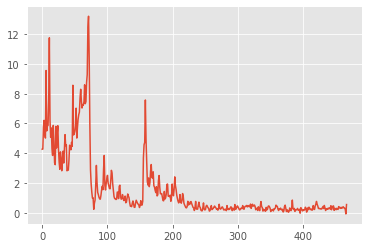

In [310]:
plt.plot(inflacion.Inflacion)

## Agregados

In [311]:
agregados = pd.read_csv("../Datos/agregados.csv", na_values="N/E")
for column in agregados.columns:
    if column != "Fecha":
        agregados[column] = agregados[column].apply(lambda n:float(n.replace(",","")) if isinstance(n,str) else n) 
agregados

,Fecha,Base Monetaria,M1,M2
0,Dic 1985,2.741031e+06,NaN,NaN
1,Ene 1986,2.742224e+06,NaN,NaN
2,Feb 1986,2.795784e+06,NaN,NaN
3,Mar 1986,3.100850e+06,NaN,NaN
4,Abr 1986,2.978586e+06,NaN,NaN
...,...,...,...,...
416,Ago 2020,1.914938e+09,5.244100e+09,1.016864e+10
417,Sep 2020,1.898295e+09,5.223456e+09,1.012266e+10
418,Oct 2020,1.920444e+09,5.329239e+09,1.012341e+10
419,Nov 2020,1.990506e+09,5.384277e+09,1.012288e+10


In [312]:
agregados.dropna(how="any")

,Fecha,Base Monetaria,M1,M2
180,Dic 2000,2.089431e+08,5.756348e+08,1.817197e+09
181,Ene 2001,1.819492e+08,5.248361e+08,1.776421e+09
182,Feb 2001,1.762739e+08,5.171866e+08,1.793738e+09
183,Mar 2001,1.761099e+08,5.097019e+08,1.813185e+09
184,Abr 2001,1.745707e+08,5.119524e+08,1.831650e+09
...,...,...,...,...
415,Jul 2020,1.914662e+09,5.246041e+09,1.018146e+10
416,Ago 2020,1.914938e+09,5.244100e+09,1.016864e+10
417,Sep 2020,1.898295e+09,5.223456e+09,1.012266e+10
418,Oct 2020,1.920444e+09,5.329239e+09,1.012341e+10


La base monetaria está bien, pero los M1 y M2 están incompletos hasta el 2000

Text(0.5, 1.0, 'M2')

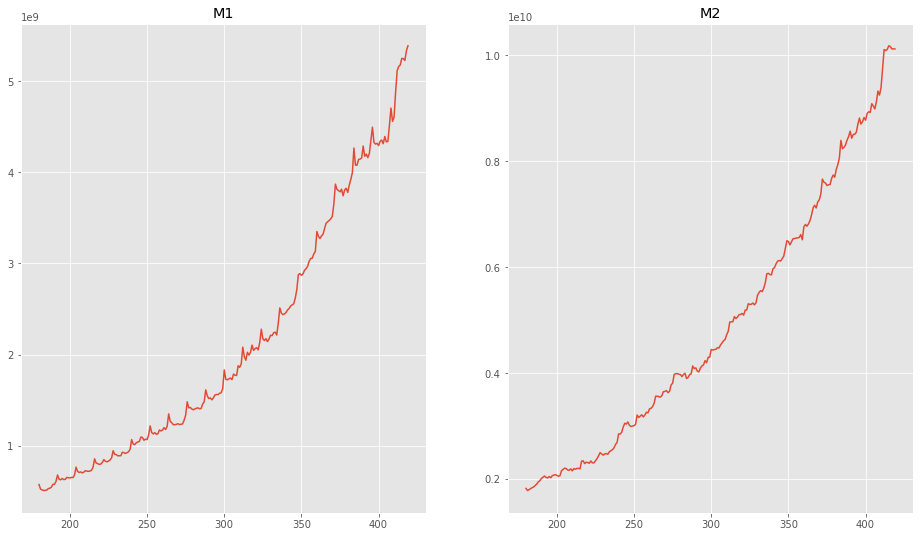

In [313]:
fig, ax = plt.subplots(ncols=2, figsize=(16,9))
ax[0].plot(agregados.M1)
ax[0].set_title("M1")

ax[1].plot(agregados.M2)
ax[1].set_title("M2")

Estos si se podría imputar por medio de algún polinomio cúbico

In [314]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

(421,)

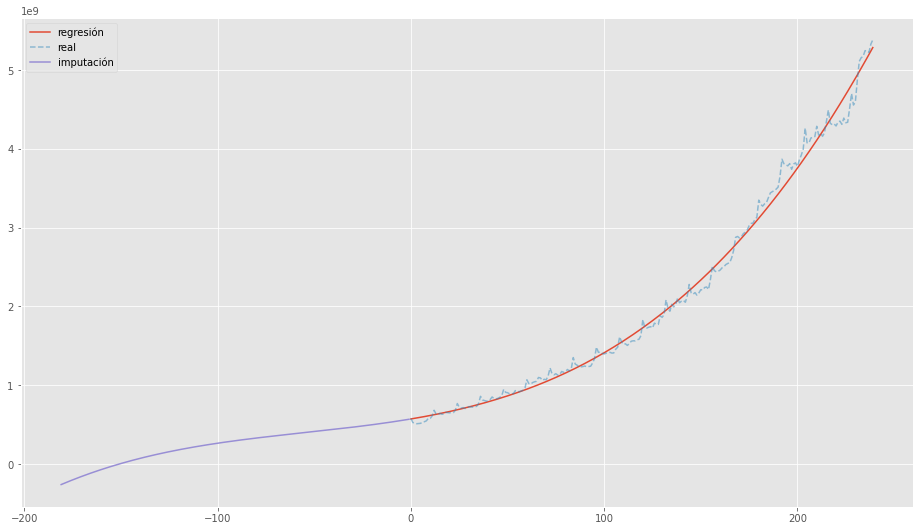

In [315]:
poly_reg = Pipeline([("poly_features", PolynomialFeatures(degree=3)),
                     ("linear_regression", LinearRegression())])

array_m1 = agregados.M1.dropna().values
X_m1 = np.arange(0, array_m1.size).reshape(-1,1)

poly_reg.fit(X_m1, array_m1)

y_m1 = poly_reg.predict(X_m1)

x_predict = np.arange(-181,0)
x_predict.shape = (-1,1)

y_predict = poly_reg.predict(x_predict)

agregados.M1.isna().sum()

plt.figure(figsize=(16,9))
plt.plot(X_m1, y_m1, label="regresión")
plt.plot(array_m1, label="real", ls="--", alpha=0.5)

plt.plot(x_predict.ravel(), y_predict, label="imputación")
plt.legend()

final = np.concatenate([y_predict,y_m1])
final.shape

Se ve bien, vamos a rellenar lo que nos falta

In [316]:
def imputar_m(df, which):
    poly_reg = Pipeline([("poly_features", PolynomialFeatures(degree=3)),
                         ("linear_regression", LinearRegression())])
    y_train = agregados[which].dropna().values
    X_train = np.arange(0, y_train.size).reshape(-1,1)
    poly_reg.fit(X_train, y_train)
    
    n_nans = agregados[which].isna().sum()
    X_predict = np.arange(-n_nans,0).reshape(-1,1)
    y_predict = poly_reg.predict(X_predict)
    
    df_imputed = df.copy()
    df_imputed[which] = np.concatenate([y_predict,y_train])
    
    return df_imputed

In [317]:
agregados_casi_completo = imputar_m(agregados, "M1")
agregados_completo = imputar_m(agregados_casi_completo, "M2")

agregados_completo

,Fecha,Base Monetaria,M1,M2
0,Dic 1985,2.741031e+06,-2.625715e+08,-3.473132e+08
1,Ene 1986,2.742224e+06,-2.522547e+08,-3.325788e+08
2,Feb 1986,2.795784e+06,-2.420593e+08,-3.179419e+08
3,Mar 1986,3.100850e+06,-2.319842e+08,-3.034015e+08
4,Abr 1986,2.978586e+06,-2.220287e+08,-2.889565e+08
...,...,...,...,...
416,Ago 2020,1.914938e+09,5.246041e+09,1.018146e+10
417,Sep 2020,1.898295e+09,5.244100e+09,1.016864e+10
418,Oct 2020,1.920444e+09,5.223456e+09,1.012266e+10
419,Nov 2020,1.990506e+09,5.329239e+09,1.012341e+10


Ahora ya podemos hacer el agregado trimestral

In [318]:
agregados_trimestrales = agregar_trimestral(agregados_completo)
agregados_trimestrales

Base Monetaria             M1            M2
Año  Trimestre                                             
1993 T1            3.617908e+07  2.802916e+08  6.710978e+08
     T2            3.579491e+07  2.904517e+08  7.016594e+08
     T3            3.570483e+07  3.002878e+08  7.321765e+08
     T4            4.085851e+07  3.098260e+08  7.626778e+08
1994 T1            4.308890e+07  3.190927e+08  7.931914e+08
...                         ...           ...           ...
2019 T3            1.562234e+09  4.351109e+09  8.981530e+09
     T4            1.642256e+09  4.393462e+09  9.052353e+09
2020 T1            1.712852e+09  4.619618e+09  9.322294e+09
     T2            1.833235e+09  5.047059e+09  9.983913e+09
     T3            1.909298e+09  5.221241e+09  1.015398e+10

[111 rows x 3 columns]

In [319]:
kiko = pd.concat([agregados_trimestrales, inflacion_trimestral, 
                   tiie_trimestral,tipos_trimestral], axis=1)
kiko.

Base Monetaria             M1            M2  Inflacion  \
Año  Trimestre                                                           
1993 T1            3.617908e+07  2.802916e+08  6.710978e+08   1.130000   
     T2            3.579491e+07  2.904517e+08  7.016594e+08   0.513333   
     T3            3.570483e+07  3.002878e+08  7.321765e+08   0.613333   
     T4            4.085851e+07  3.098260e+08  7.626778e+08   0.440000   
1994 T1            4.308890e+07  3.190927e+08  7.931914e+08   0.746667   
...                         ...           ...           ...        ...   
2019 T3            1.562234e+09  4.351109e+09  8.981530e+09   0.253333   
     T4            1.642256e+09  4.393462e+09  9.052353e+09   0.293333   
2020 T1            1.712852e+09  4.619618e+09  9.322294e+09   0.326667   
     T2            1.833235e+09  5.047059e+09  9.983913e+09   0.343333   
     T3            1.909298e+09  5.221241e+09  1.015398e+10   0.346667   

                tasa_interes  Tipo_cambio  
Año  Trimestre                             
1993 T1             1.130000     3.107135  
     T2             0.513333     3.113394  
     T3             0.613333     3.117846  
     T4             0.440000     3.121773  
1994 T1             0.746667     3.227980  
...                      ...          ...  
2019 T3             0.253333    19.391890  
     T4             0.293333    19.192773  
2020 T1             0.326667    20.818174  
     T2             0.343333    22.582584  
     T3             0.346667    21.801972  

[111 rows x 6 columns]

In [295]:
kiko.to_csv("../Datos/")

Tipo_cambio
Año  Trimestre             
1993 T1            3.107135
     T2            3.113394
     T3            3.117846
     T4            3.121773
1994 T1            3.227980
...                     ...
2019 T3           19.391890
     T4           19.192773
2020 T1           20.818174
     T2           22.582584
     T3           21.801972

[111 rows x 1 columns]

In [289]:
for df in [agregados_trimestrales, inflacion_trimestral, 
                   tiie_trimestral, tipos_trimestral]:
    display(df)

Base Monetaria             M1            M2
Año  Trimestre                                             
1993 T1            3.617908e+07  2.802916e+08  6.710978e+08
     T2            3.579491e+07  2.904517e+08  7.016594e+08
     T3            3.570483e+07  3.002878e+08  7.321765e+08
     T4            4.085851e+07  3.098260e+08  7.626778e+08
1994 T1            4.308890e+07  3.190927e+08  7.931914e+08
...                         ...           ...           ...
2019 T3            1.562234e+09  4.351109e+09  8.981530e+09
     T4            1.642256e+09  4.393462e+09  9.052353e+09
2020 T1            1.712852e+09  4.619618e+09  9.322294e+09
     T2            1.833235e+09  5.047059e+09  9.983913e+09
     T3            1.909298e+09  5.221241e+09  1.015398e+10

[111 rows x 3 columns]

Inflacion
Año  Trimestre           
1993 T1          1.130000
     T2          0.513333
     T3          0.613333
     T4          0.440000
1994 T1          0.746667
...                   ...
2019 T3          0.253333
     T4          0.293333
2020 T1          0.326667
     T2          0.343333
     T3          0.346667

[111 rows x 1 columns]

Porcentaje Inflacion 
Año  Trimestre                       
1993 T1                      1.130000
     T2                      0.513333
     T3                      0.613333
     T4                      0.440000
1994 T1                      0.746667
...                               ...
2019 T3                      0.253333
     T4                      0.293333
2020 T1                      0.326667
     T2                      0.343333
     T3                      0.346667

[111 rows x 1 columns]

Tipo_cambio
Año  Trimestre             
1993 T1            3.107135
     T2            3.113394
     T3            3.117846
     T4            3.121773
1994 T1            3.227980
...                     ...
2019 T3           19.391890
     T4           19.192773
2020 T1           20.818174
     T2           22.582584
     T3           21.801972

[111 rows x 1 columns]